# Insurance Costs Prediction using Ensemble Learners

The aims of this project is to build an insurance costs prediction model using ensemble learners. The goal of ensemble methods is to combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability (robustness) over a single estimator. For the purpose of this project, we use three different methods, there are:

- Random Forest
- AdaBoost
- Gradient Boosting Tree

***
Variables included in the dataset :

- charges   : individual medical costs billed by health insurance
- age       : age of primary beneficiary
- sex       : insurance contractor gender, female, male
- bmi       : body mass index
- children  : number of children covered by health insurance
- smoker    : smoking
- region    : the beneficiary's residential area in the US, northeast, southeast, southwest, northwest

***

Dataset source : https://github.com/stedy/Machine-Learning-with-R-datasets


Import Library

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Load Dataset

In [2]:
dataset = pd.read_csv("dataset/insurance.csv")
dataset.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


## Data Summarization and Visualization

Shows the summary of the data

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


It can be seen that some variables such as sex, smoker, and region are in categorical, therefore we need to encode this variables later. We also can see that there's no missing values in our data

Generate descriptive statistics of the dataset

In [4]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Plot the histogram of each column

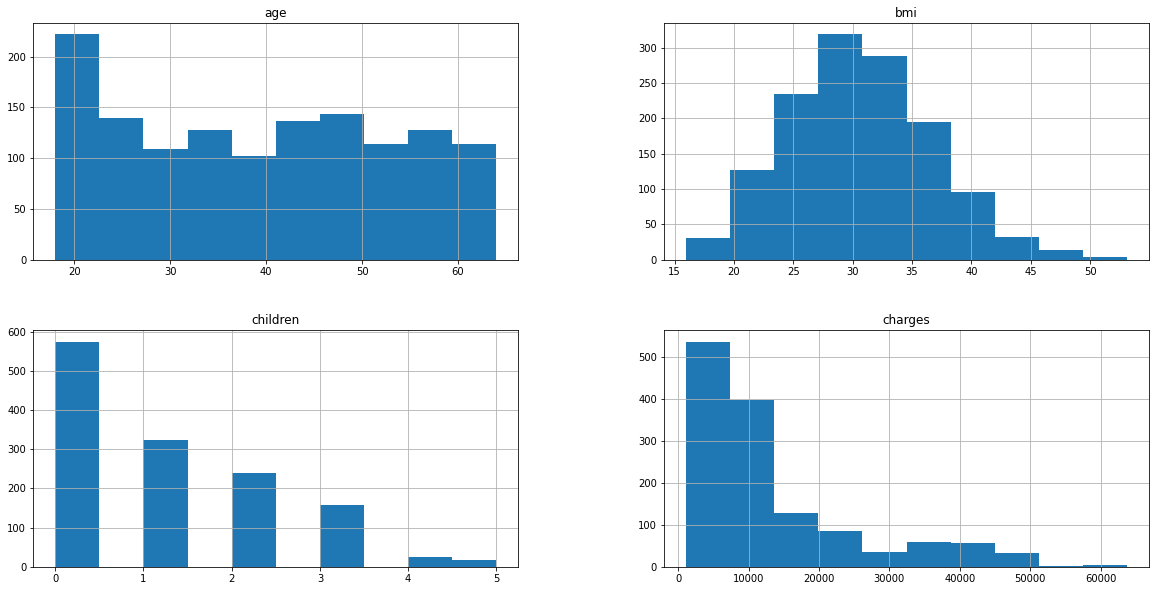

In [5]:
dataset.hist(figsize=(20,10));

Shows Pearson's correlation from the independent variable to the dependent variable (charges)

In [6]:
dataset.corr(method = 'pearson', numeric_only=True)['charges'].sort_values(ascending=False)

charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64

It can be seen that smokers have a high correlation with medical insurance costs, and regions have a low correlation with insurance costs, so that the next column region will be dropped

## Data Preparation

Encode categorical variables using Label Encoder

In [7]:
label_encoder = LabelEncoder()
dataset['sex'] = label_encoder.fit_transform(dataset['sex'])
dataset['smoker'] = label_encoder.fit_transform(dataset['smoker'])
dataset['region'] = label_encoder.fit_transform(dataset['region'])
dataset.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
5,31,0,25.740,0,0,2,3756.62160
6,46,0,33.440,1,0,2,8240.58960
7,37,0,27.740,3,0,1,7281.50560
8,37,1,29.830,2,0,0,6406.41070
9,60,0,25.840,0,0,1,28923.13692


Split the target and features

In [8]:
X = dataset.drop(["charges"], axis=1)
y = pd.DataFrame(dataset["charges"].copy())

Splitting data into train and test set

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size = 0.20, random_state = 42)

Scale the data using StandardScaler

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## Model Training

Building Gradient Boosting, Random Forest, and AdaBoost models

In [11]:
gb = GradientBoostingRegressor().fit(X_train, y_train) 
rf = RandomForestRegressor().fit(X_train, y_train)               
adb = AdaBoostRegressor().fit(X_train, y_train)

In [12]:
def get_results(model, X_train, X_test, y_train, y_test):
    train_prediction = model.predict(X_train)
    test_prediction = model.predict(X_test)

    train_rsq = model.score(X_train, y_train)
    test_rsq = model.score(X_test, y_test)
    train_rmse = np.sqrt(mean_squared_error(y_train, train_prediction))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_prediction))

    return train_rsq, test_rsq, train_rmse, test_rmse

In [13]:
gb_rsq_train, gb_rsq_test, gb_rmse_train, gb_rmse_test = get_results(gb, X_train, X_test, y_train, y_test)
rf_rsq_train, rf_rsq_test, rf_rmse_train, rf_rmse_test = get_results(rf, X_train, X_test, y_train, y_test)
adb_rsq_train, adb_rsq_test, adb_rmse_train, adb_rmse_test = get_results(adb, X_train, X_test, y_train, y_test)

## Model Evaluation

In [14]:
results = [
    ['Gradient Boosting', gb_rsq_train, gb_rsq_test, gb_rmse_train, gb_rmse_test], 
    ['Random Forest', rf_rsq_train, rf_rsq_test, rf_rmse_train, rf_rmse_test], 
    ['AdaBoost', adb_rsq_train, adb_rsq_test, adb_rmse_train, adb_rmse_test]
]    

result_table = pd.DataFrame(results, columns= ['Method', 'R\u00b2 Train', 'R\u00b2 Test', 'RMSE Train', 'RMSE Test'])
result_table.round(3)

,Method,R² Train,R² Test,RMSE Train,RMSE Test
0,Gradient Boosting,0.898,0.877,3836.065,4362.438
1,Random Forest,0.975,0.864,1905.552,4588.304
2,AdaBoost,0.818,0.820,5130.405,5286.928


From the three models that have been built above, it can be seen that the Gradient Boosting model is decent with obtained R2 = 0.878 and RMSE = 4362.44 on the testing set.

Shows the prediction and residual plot of Gradient Boosting model result

In [16]:
gb_train_pred = gb.predict(X_train)
gb_test_pred = gb.predict(X_test)

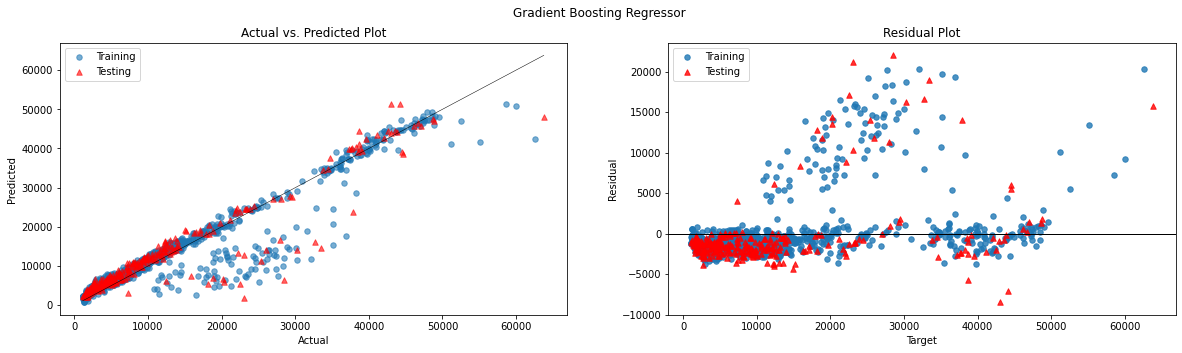

In [34]:
residual_train = y_train - gb_train_pred
residual_test = y_test - gb_test_pred

fig=plt.figure(figsize=(20,5))
plt.suptitle('Gradient Boosting Regressor')

ax1=plt.subplot(1,2,1)
ax1.scatter(y_train, gb_train_pred, s=30, alpha=0.6, label='Training')
ax1.scatter(y_test, gb_test_pred, marker='^', s=30, alpha=0.6, c='r', label='Testing')
ax1.plot([y.min(), y.max()], [y.min(), y.max()], 'k', lw=0.5)
ax1.set_title('Actual vs. Predicted Plot')
ax1.set_xlabel('Actual')
ax1.set_ylabel('Predicted')
ax1.legend()

ax2=plt.subplot(1,2,2)
ax2.scatter(y_train, residual_train, s=30, alpha=0.8, label="Training")
ax2.scatter(y_test, residual_test, marker="^", s=30, c="r", alpha=0.8, label="Testing")
ax2.axhline(linewidth= 1, linestyle='-', c='black')
ax2.legend()
ax2.set_title('Residual Plot')
ax2.set_xlabel('Target')
ax2.set_ylabel('Residual')

plt.show()

## Conclusion

From the three models that have been built above, it can be seen that the Gradient Boosting model is decent with obtained R2 = 0.878 and RMSE = 4362.44 on the testing set.
